<h1> Guided lab: Regression Models with Keras</h1>

Objective for this Notebook

- How to use the Tensorflow API, Keras, to build a regression model.
- Download and Clean dataset
- Build a Neural Network
- Train and Test the Network   

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Download and Clean Dataset</a>  
2. <a href="#item32">Import Keras</a>  
3. <a href="#item33">Build a Neural Network</a>  
4. <a href="#item34">Train and Test the Network</a>  

</font>
</div>


<a id="item31"></a>


## Download and Clean Dataset


Let's start by importing the <em>pandas</em> and the Numpy libraries.


In [129]:
import pandas as pd
import numpy as np

We will be playing around with the same dataset that we used in the videos.

<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>


Let's download the data and read it into a <em>pandas</em> dataframe.


In [133]:
# Downloads the data and reads it into a pandas dataframe.
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa. 


#### Let's check how many data points we have.


In [136]:
# Checks how many data points are in the data.
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.


Let's check the dataset for any missing values.


In [141]:
# Checks the dataset for any missing values.
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [143]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.


#### Split data into predictors and target


The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.


In [148]:
concrete_data_columns = concrete_data.columns

# Splits data into predictors and target
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] 
target = concrete_data['Strength'] 

Let's do a quick sanity check of the predictors and the target dataframes.


In [151]:
# Checks the predictors dataframe.
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [153]:
# Checks the target dataframe.
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.


In [156]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Let's save the number of predictors to *n_cols* since we will need this number when building our network.


In [159]:
# Saves the number of predictors to n_cols
n_cols = predictors_norm.shape[1] # number of predictors

<a id='item32'></a>


## Import Keras


Recall from the videos that Keras normally runs on top of a low-level library such as TensorFlow. This means that to be able to use the Keras library, you will have to install TensorFlow first and when you import the Keras library, it will be explicitly displayed what backend was used to install the Keras library. In CC Labs, we used TensorFlow as the backend to install Keras, so it should clearly print that when we import Keras.


#### Let's go ahead and import the Keras library


In [165]:
# Imports the necessary libraries
from tensorflow import keras

As you can see, the TensorFlow backend was used to install the Keras library.


Let's import the rest of the packages from the Keras library that we will need to build our regressoin model.


In [169]:
# Imports packages from the Keras library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

## Build a Neural Network


Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.


In [173]:
# Defines a function that defines the regression model

# Uses an input object to explicitly define the input shape.
def regression_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # Use the passed input_dim
        Dense(50, activation='relu'),  # Hidden layer 1
        Dense(50, activation='relu'),  # Hidden layer 2
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


The above function create a model that has two hidden layers, each of 50 hidden units.


## Train and Test the Network


Let's call the function now to create our model.


In [177]:
# Calls the function to create the model

# Defines input_dim
input_dim = X_train.shape[1]

# Builds the model
model = regression_model(input_dim)

# Prints the model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,051 (11.92 KB)

 Trainable params: 3,051 (11.92 KB)

 Non-trainable params: 0 (0.00 B)

Now we will split our data into training and testing with a 70%-30% split (test_size=0.3).   

70% of our data will be used for training :

X_train : Our training data containing the variables the model will use to learn how to predict.

y_train : Our training data containing the labels.

#
30% of our data will be used for testing its performance metrics :

X_test : Unseen data by the model, we will use it to make predictions with our trained model.

y_test : The labels associated with X_test data, we will compare them with the predictions that our model provided as output when shown X_test and that way we will obtain performance metrics.

In [179]:
from sklearn.model_selection import train_test_split
import numpy as np

# Generates random data for demonstration purposes
data = np.random.rand(1030, 8)  
target = np.random.rand(1030)  

# Splits the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

# Verifies the split
print("Training Data Shape (X_train):", X_train.shape)
print("Testing Data Shape (X_test):", X_test.shape)
print("Training Labels Shape (y_train):", y_train.shape)
print("Testing Labels Shape (y_test):", y_test.shape)

Training Data Shape (X_train): (721, 8)
Testing Data Shape (X_test): (309, 8)
Training Labels Shape (y_train): (721,)
Testing Labels Shape (y_test): (309,)


Next, we will train the model using the *fit* method. We will train the model for 100 epochs.


In [207]:
# Fits the model
# Trains the model
history = model.fit(
    X_train,  # Training data
    y_train,  # Training labels
    epochs=100,  # Number of epochs
    batch_size=32,  # Default batch size, can be adjusted for performance
    validation_data=(X_test, y_test),  # Use test data for validation during training
    verbose=1  # Print training progress
)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - mae: 0.0297 - val_loss: 0.2093 - val_mae: 0.3665
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 - mae: 0.0278 - val_loss: 0.2112 - val_mae: 0.3662
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - mae: 0.0298 - val_loss: 0.2108 - val_mae: 0.3674
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - mae: 0.0305 - val_loss: 0.2131 - val_mae: 0.3698
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - mae: 0.0292 - val_loss: 0.2153 - val_mae: 0.3706
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 - mae: 0.0323 - val_loss: 0.2143 - val_mae: 0.3722
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - mae: 0.0311 - val_loss: 0.2110 - val_mae: 0.3683
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - mae: 0.0320 - val_loss: 0.2136 - val_mae: 0.3697
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.002

### Now lets evaluate our model and get performance metrics !

First, since our model only saw the training data and learned from it, we will make predictions on the unseen test set.

y_pred are the predictions that our model generated from it's experience when shown the predictor variables of X_test.

That way we can compare y_pred (predictions made by our model) with y_test (the real labels of X_test) and see the difference as performance metrics.

In [210]:
# Makes predictions on the test set
y_pred = model.predict(X_test)

# Prints a few predictions and actual values for comparison
for i in range(5):  # Adjust the range to see more/less comparisons
    print(f"Predicted: {y_pred[i][0]:.4f}, Actual: {y_test[i]:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted: 0.3611, Actual: 0.2456
Predicted: 0.7134, Actual: 0.8202
Predicted: 0.5279, Actual: 0.6304
Predicted: 0.6414, Actual: 0.9242
Predicted: 0.8429, Actual: 0.6084


In [217]:
# Evaluates the performance of the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mr2 = r2_score(y_test, y_pred)


Since this is a regression model we will be using mean squared error, mean absolute error and the r squared score to evaluate it.

In [220]:
# Calculates and prints the regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nPerformance Metrics:")
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R² Score: {r2:.4f}')


Performance Metrics:
Mean Squared Error (MSE): 0.2157
Mean Absolute Error (MAE): 0.3701
R² Score: -1.3275


In [240]:
# Experiments with increasing neurons in the first hidden layer
for neurons in [32, 64, 128, 256]:
    print(f"Experiment with {neurons} neurons in the first hidden layer:")
    
    def regression_model(input_dim):
        model = Sequential([
            Input(shape=(input_dim,)),
            Dense(neurons, activation='relu'),
            Dense(32, activation='relu'),  # Keep second hidden layer fixed
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        return model

    # Create and train the model
    model = regression_model(X_train.shape[1])
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"  MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}\n")

Experiment with 32 neurons in the first hidden layer:
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  MSE: 0.1095, MAE: 0.2832, R²: -0.1816

Experiment with 64 neurons in the first hidden layer:
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  MSE: 0.1103, MAE: 0.2792, R²: -0.1904

Experiment with 128 neurons in the first hidden layer:
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  MSE: 0.1174, MAE: 0.2856, R²: -0.2674

Experiment with 256 neurons in the first hidden layer:
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  MSE: 0.1185, MAE: 0.2838, R²: -0.2785



In [242]:
# Experiments with adding more hidden layers
for layers in [2, 3, 4, 5]:
    print(f"Experiment with {layers} hidden layers:")
    
    def regression_model(input_dim):
        model = Sequential()
        model.add(Input(shape=(input_dim,)))
        for _ in range(layers):
            model.add(Dense(64, activation='relu'))  # Fixed 64 neurons per layer
        model.add(Dense(1))  # Output layer
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        return model

    # Creates and trains the model
    model = regression_model(X_train.shape[1])
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Evaluates the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"  MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}\n")

Experiment with 2 hidden layers:
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  MSE: 0.1082, MAE: 0.2771, R²: -0.1675

Experiment with 3 hidden layers:
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  MSE: 0.1443, MAE: 0.3034, R²: -0.5569

Experiment with 4 hidden layers:
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  MSE: 0.1572, MAE: 0.3255, R²: -0.6969

Experiment with 5 hidden layers:
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
  MSE: 0.1542, MAE: 0.3206, R²: -0.6639



In [244]:
# Experiments with varying the number of epochs
for epochs in [50, 100, 150, 200]:
    print(f"Experiment with {epochs} epochs:")
    
    def regression_model(input_dim):
        model = Sequential([
            Input(shape=(input_dim,)),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        return model

    # Creates and trains the model
    model = regression_model(X_train.shape[1])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Evaluates the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"  MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}\n")

Experiment with 50 epochs:
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  MSE: 0.0993, MAE: 0.2722, R²: -0.0713

Experiment with 100 epochs:
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  MSE: 0.1070, MAE: 0.2766, R²: -0.1550

Experiment with 150 epochs:
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  MSE: 0.1162, MAE: 0.2877, R²: -0.2539

Experiment with 200 epochs:
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
  MSE: 0.1296, MAE: 0.2980, R²: -0.3987



**Experiment Results**
**Experiments with hidden layers**
Experiment with 2 hidden layers:
  MSE: 0.1082, MAE: 0.2771, R²: -0.1675

Experiment with 3 hidden layers:
  MSE: 0.1443, MAE: 0.3034, R²: -0.5569

Experiment with 4 hidden layers:
  MSE: 0.1572, MAE: 0.3255, R²: -0.6969

Experiment with 5 hidden layers:
  MSE: 0.1542, MAE: 0.3206, R²: -0.6639

**Experiments with changing the number of neurons**
Experiment with 32 neurons in the first hidden layer:
  MSE: 0.1095, MAE: 0.2832, R²: -0.1816

Experiment with 64 neurons in the first hidden layer:
  MSE: 0.1103, MAE: 0.2792, R²: -0.1904

Experiment with 128 neurons in the first hidden layer:
  MSE: 0.1174, MAE: 0.2856, R²: -0.2674

Experiment with 256 neurons in the first hidden layer:
  MSE: 0.1185, MAE: 0.2838, R²: -0.2785

**Experiments with changing the number of epochs**
Experiment with 50 epochs:
  MSE: 0.0993, MAE: 0.2722, R²: -0.0713

Experiment with 100 epochs:
  MSE: 0.1070, MAE: 0.2766, R²: -0.1550

Experiment with 150 epochs:
  MSE: 0.1162, MAE: 0.2877, R²: -0.2539

Experiment with 200 epochs:
  MSE: 0.1296, MAE: 0.2980, R²: -0.3987

**Observations**
-2 hidden layers yield lower MSE, MAE and better r-squared.

-32 neurons in the first layer appears to be the best option. Increasing neurons beyond
64 may lead to overfitting.

-50 epochs yield the best performance. Training with more than 100 epochs results in
overfitting and worse performance metrics.

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1833 - mae: 0.3518 - val_loss: 0.1161 - val_mae: 0.2825
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1059 - mae: 0.2761 - val_loss: 0.1038 - val_mae: 0.2714
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0927 - mae: 0.2582 - val_loss: 0.1003 - val_mae: 0.2685
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0904 - mae: 0.2585 - val_loss: 0.0984 - val_mae: 0.2676
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0917 - mae: 0.2608 - val_loss: 0.1004 - val_mae: 0.2678
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0891 - mae: 0.2561 - val_loss: 0.0975 - val_mae: 0.2661
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0835 - mae: 0.2500 - val_loss: 0.0968 - val_mae: 0.2680
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0867 - mae: 0.2525 - val_loss: 0.0959 - val_mae: 0.2661
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0875 - mae: 

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

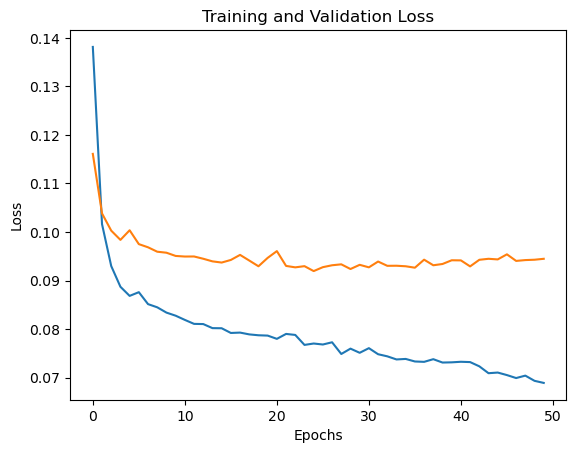

In [246]:
# The following model combines the above 3 findings and evaluates its performance
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Defines the optimal regression model
def optimized_regression_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # Input layer
        Dense(32, activation='relu'),  # First hidden layer with 32 neurons
        Dense(32, activation='relu'),  # Second hidden layer with 32 neurons
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Gets input dimension from training data
input_dim = X_train.shape[1]

# Creates the model
final_model = optimized_regression_model(input_dim)

# Trains the model
history = final_model.fit(
    X_train,  # Training data
    y_train,  # Training labels
    epochs=50,  # Optimal number of epochs
    batch_size=32,  # Default batch size
    validation_data=(X_test, y_test),  # Evaluate on test data during training
    verbose=1  # Display training progress
)

# Evaluates the model
test_loss, test_mae = final_model.evaluate(X_test, y_test, verbose=1)
print(f"Final Model Performance:")
print(f"  Test Loss (MSE): {test_loss:.4f}")
print(f"  Test MAE: {test_mae:.4f}")

# Makes predictions on the test set
y_pred = final_model.predict(X_test)

# Calculates performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Prints performance metrics
print("\nPerformance Metrics:")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  R² Score: {r2:.4f}")

# Plots training and validation loss for visual evaluation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend

Feel free to vary the following and note what impact each change has on the model's performance:

1. Increase or decreate number of neurons in hidden layers
2. Add more hidden layers
3. Increase number of epochs


For other models, other types of performance metrics are more meaningfull. It all depends on context and the end goal of the model. 

Research, planning and analysing various metrics with a clearly defined end goal is key to understanding how capable a model is and what are his limitations.

Keep that in mind when tackling the next exercises!

### Thank you for following this tutorial!